In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

2024-10-30 18:42:40.299852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730293960.373770     872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730293960.394401     872 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 18:42:40.579569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Training image processing

trainingSet = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1730293973.551613     872 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
#Validation image processing

validationSet = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


In [28]:
trainingSet

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [29]:
for x, y in trainingSet:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[117.5  102.5  109.5 ]
   [119.25 104.25 111.25]
   [112.5   97.5  104.5 ]
   ...
   [133.25 119.25 119.25]
   [149.   135.   135.  ]
   [160.   146.   146.  ]]

  [[143.   128.   135.  ]
   [127.75 112.75 119.75]
   [143.5  128.5  135.5 ]
   ...
   [139.   125.   125.  ]
   [159.5  145.5  145.5 ]
   [129.25 115.25 115.25]]

  [[127.   112.   119.  ]
   [126.25 111.25 118.25]
   [120.75 105.75 112.75]
   ...
   [132.   118.   118.  ]
   [130.25 116.25 116.25]
   [133.   119.   119.  ]]

  ...

  [[198.   189.   194.  ]
   [188.75 179.75 184.75]
   [195.25 186.25 191.25]
   ...
   [213.75 205.75 203.75]
   [208.5  200.5  198.5 ]
   [222.25 214.25 212.25]]

  [[199.25 190.25 195.25]
   [198.   189.   194.  ]
   [200.5  191.5  196.5 ]
   ...
   [217.   209.   207.  ]
   [211.25 203.25 201.25]
   [215.5  207.5  205.5 ]]

  [[201.25 192.25 197.25]
   [196.5  187.5  192.5 ]
   [193.5  184.5  189.5 ]
   ...
   [218.25 210.25 208.25]
   [209.75 201.75 199.75]
   [210.5  202.5  20

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [6]:
#Building Model

model = Sequential()

In [7]:
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

/home/srayan/Programs/Leaf-Disease-Detection/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500, activation="relu"))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer
model.add(Dense(units=38, activation="softmax"))

In [17]:
#Compiling Model

model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#Training Model

trainingHistory = model.fit(x=trainingSet, validation_data=validationSet, epochs=10)

Epoch 1/10
2195/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3740 - loss: 2.2312

2024-10-30 19:15:06.147084: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2141', 96 bytes spill stores, 96 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 70ms/step - accuracy: 0.3743 - loss: 2.2305 - val_accuracy: 0.8480 - val_loss: 0.4917
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.8361 - loss: 0.5229 - val_accuracy: 0.9064 - val_loss: 0.2871
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.9043 - loss: 0.2929 - val_accuracy: 0.9311 - val_loss: 0.2067
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.9372 - loss: 0.1946 - val_accuracy: 0.9437 - val_loss: 0.1757
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 67ms/step - accuracy: 0.9518 - loss: 0.1461 - val_accuracy: 0.9561 - val_loss: 0.1366
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.9631 - loss: 0.1094 - val_accuracy: 0.9566 - val_loss: 0.1385
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9714 - loss: 0.0862 - val_accuracy: 0.9581 - val_loss: 0.1382
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9751 - lo

In [47]:
#Model Evalutaion

trainLoss, trainAccuracy = model.evaluate(trainingSet)

2193/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9922 - loss: 0.0228

2024-10-30 19:37:27.865010: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 52 bytes spill stores, 52 bytes spill loads

2024-10-30 19:37:27.928646: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 100 bytes spill stores, 100 bytes spill loads

2024-10-30 19:37:28.138497: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 400 bytes spill stores, 400 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9922 - loss: 0.0228


In [48]:
print(trainLoss, trainAccuracy)

0.021659156307578087 0.9925599098205566


In [49]:
trainLoss, trainAccuracy = model.evaluate(validationSet)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9722 - loss: 0.1056


In [50]:
print(trainLoss, trainAccuracy)

0.10665672272443771 0.9703505635261536


In [51]:
model.save("trainedModel.keras")

In [52]:
trainingHistory.history

{'accuracy': [0.5813784599304199,
  0.8593783378601074,
  0.9133224487304688,
  0.9398676753044128,
  0.9542072415351868,
  0.9642080068588257,
  0.97134929895401,
  0.97584468126297,
  0.9789600968360901,
  0.9806103110313416],
 'loss': [1.4282338619232178,
  0.4445769190788269,
  0.26916995644569397,
  0.18450506031513214,
  0.13960766792297363,
  0.10680963844060898,
  0.08607405424118042,
  0.07284338027238846,
  0.06298211961984634,
  0.05983175337314606],
 'val_accuracy': [0.8479968309402466,
  0.9064420461654663,
  0.9310835599899292,
  0.9436603784561157,
  0.9560664892196655,
  0.9566355347633362,
  0.9580582976341248,
  0.9681311249732971,
  0.9664807915687561,
  0.9703505635261536],
 'val_loss': [0.49171045422554016,
  0.28707680106163025,
  0.20674088597297668,
  0.17566056549549103,
  0.1366286426782608,
  0.1385170817375183,
  0.13824835419654846,
  0.1084241271018982,
  0.11470064520835876,
  0.10665664821863174]}

In [53]:
#Recording History

import json

with open("trainingHistory.json", "w") as file:
    json.dump(trainingHistory.history, file)

<function matplotlib.pyplot.show(close=None, block=None)>

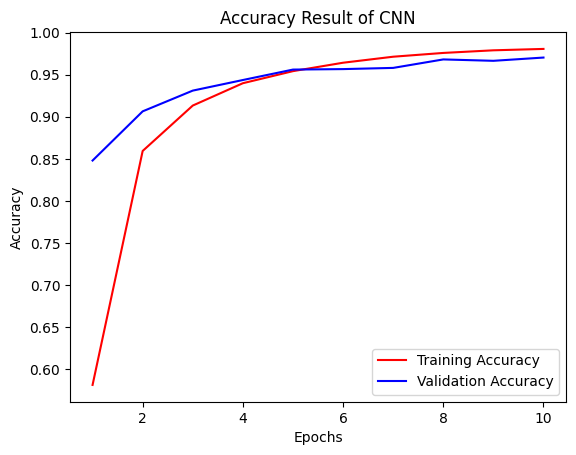

In [54]:
#Accuracy Visualization

epochs = [i for i in range(1, 11)]
plt.plot(epochs, trainingHistory.history["accuracy"], color="red", label="Training Accuracy")
plt.plot(epochs, trainingHistory.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Result of CNN")
plt.legend()
plt.show

In [55]:
className = validationSet.class_names

In [56]:
testSet = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = False,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


In [57]:
yPred = model.predict(testSet)
yPred, yPred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


(array([[9.9999666e-01, 3.4831606e-12, 3.5180355e-11, ..., 3.3703733e-15,
         4.4799774e-17, 5.9287889e-15],
        [1.0000000e+00, 2.8292702e-10, 2.3204282e-10, ..., 2.6891133e-16,
         1.9602271e-17, 1.3123301e-16],
        [1.0000000e+00, 9.4470197e-18, 8.5928941e-16, ..., 1.1081156e-23,
         1.7663976e-24, 2.7677869e-21],
        ...,
        [3.1822164e-08, 5.1432397e-10, 2.8781531e-07, ..., 1.8649098e-09,
         6.1265015e-09, 9.9996245e-01],
        [8.4696117e-10, 1.4044240e-13, 2.3909617e-09, ..., 3.7026812e-11,
         1.1931617e-12, 9.9999988e-01],
        [2.3490118e-18, 1.7393286e-19, 5.6556601e-18, ..., 1.7944722e-19,
         1.4276599e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [58]:
predictedCategories = tf.argmax(yPred, axis=1)

In [59]:
predictedCategories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
trueCategory = tf.concat([y for x, y in testSet], axis = 0)
trueCategory

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [61]:
yTrue = tf.argmax(trueCategory, axis=1)
yTrue

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(yTrue, predictedCategories, target_names=className))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.98      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.97      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.89      0.